In [1]:
import cv2
import numpy as np
import pandas as pd

In [2]:
mkv_file_path = ['./epochs/epoch{:02d}_front.mkv'.format(i) for i in range(1,10)]
steering_file_path = ['./epochs/epoch{:02d}_steering.csv'.format(i) for i in range(1,10)]
paths = [mkv_file_path,steering_file_path]

In [3]:
#数据预处理方法
def read_mkv(path):
    cap = cv2.VideoCapture(path)
    success,frame = cap.read()
    pic = []

    while(success):
        frame = cv2.resize(frame,(320,180),interpolation=cv2.INTER_CUBIC)
        pic.append(frame[80:-30])

        success,frame = cap.read()
    return np.array(pic)

def read_steering(path):
    return pd.read_csv(path).wheel.values

In [2]:
# 读取所有视频和转向角度
features=[]
labels = []
for i in range(9):
    features.append(read_mkv(paths[0][i]))
    labels.append(read_steering(paths[1][i]))

NameError: name 'read_mkv' is not defined

In [67]:
# 保存视频和转向角度
feature = np.concatenate(tuple(features))
label = np.concatenate(tuple(labels))
np.save('feature.npy',feature)
np.save('label.npy',label)

In [4]:
#加载数据
feature = np.load('feature4.npy')
print('feature loaded successfully!')
label = np.load('label4.npy')
print('label loaded successfully!')
feature.shape

feature loaded successfully!
label loaded successfully!


(24300, 70, 260, 3)

In [5]:
from keras.layers import Dense,Activation,Convolution2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam,Adadelta

Using TensorFlow backend.


In [6]:
model = Sequential()

model.add(BatchNormalization(input_shape=(70,260,3)))

model.add(Convolution2D(kernel_size=(3,3),filters = 64,padding='same',strides=(1,1),data_format='channels_last',kernel_initializer='truncated_normal'))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Convolution2D(kernel_size=(3,3),filters = 64,padding='same',strides=(1,1),data_format='channels_last'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Convolution2D(kernel_size=(3,3),filters = 128,padding='same',strides=(1,1),data_format='channels_last'))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(kernel_size=(3,3),filters = 128,padding='same',strides=(1,1),data_format='channels_last'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Convolution2D(kernel_size=(3,3),filters = 256,padding='same',strides=(1,1),data_format='channels_last'))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Convolution2D(kernel_size=(3,3),filters = 256,padding='same',strides=(1,1),data_format='channels_last'))
# model.add(Activation('relu'))

model.add(Convolution2D(kernel_size=(3,3),filters = 256,padding='same',strides=(1,1),data_format='channels_last'))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(kernel_size=(3,3),filters = 256,padding='same',strides=(1,1),data_format='channels_last'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


# model.add(Convolution2D(kernel_size=(3,3),filters = 512,padding='same',strides=(1,1),data_format='channels_last'))
# model.add(Activation('relu'))

model.add(Convolution2D(kernel_size=(3,3),filters = 512,padding='same',strides=(1,1),data_format='channels_last'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(kernel_size=(3,3),filters = 512,padding='same',strides=(1,1),data_format='channels_last'))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(kernel_size=(3,3),filters = 512,padding='same',strides=(1,1),data_format='channels_last'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Convolution2D(kernel_size=(3,3),filters = 512,padding='same',strides=(1,1),data_format='channels_last'))
model.add(Activation('relu'))

model.add(Convolution2D(kernel_size=(3,3),filters = 512,padding='same',strides=(1,1),data_format='channels_last'))
model.add(Activation('relu'))

model.add(Convolution2D(kernel_size=(3,3),filters = 512,padding='same',strides=(1,1),data_format='channels_last'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(4096))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(1))


In [6]:
import keras.backend as K

def missing_rate(y_true, y_pred):
    return K.mean(abs(y_pred-y_true))/33.

In [10]:
adam = Adadelta()
model.compile(optimizer=adam,
             loss = 'mean_squared_error',
             metrics = [missing_rate])

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_18 (Batc (None, 70, 260, 3)        12        
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 70, 260, 64)       1792      
_________________________________________________________________
activation_33 (Activation)   (None, 70, 260, 64)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 70, 260, 64)       36928     
_________________________________________________________________
activation_34 (Activation)   (None, 70, 260, 64)       0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 70, 260, 64)       256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 35, 130, 64)       0         
__________

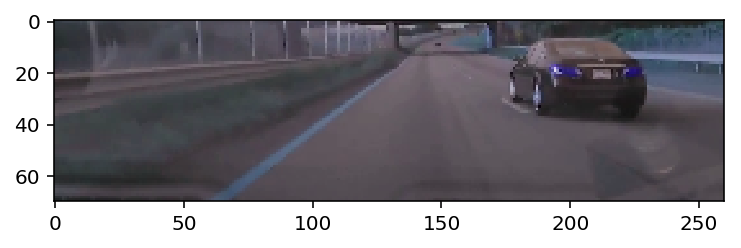

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.imshow(feature[10220])

In [11]:
model.fit(feature,label,batch_size=16,epochs=1,shuffle=True)

Epoch 1/1
24300/24300 [==============================] - 483s - loss: 1.6539 - missing_rate: 0.0308   


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 35, 160, 64)       9472      
_________________________________________________________________
activation_57 (Activation)   (None, 35, 160, 64)       0         
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 17, 79, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 17, 79, 64)        36928     
_________________________________________________________________
activation_58 (Activation)   (None, 17, 79, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 17, 79, 64)        36928     
_________________________________________________________________
activation_59 (Activation)   (None, 17, 79, 64)        0         
__________

In [12]:
#保存模型配置和权重
import h5py
model.save_weights('models/model_vggb.h5')
with open('models/model_vggb.json','w') as f:
    f.write(model.to_json())
    f.close()
    

In [ ]:
model.save_weights('models/model2.h5')
with open('models/model2.json','w') as f:
    f.write(model.to_json())
    f.close()

In [13]:
s = read_mkv('./epochs/epoch10_front.mkv')
s.shape

(2700, 70, 320, 3)

In [7]:
with open('models/model_vggb.json','r') as f:
    string = f.read()

In [8]:
from keras.models import model_from_json
model = model_from_json(string)
model.load_weights('models/model_vggb.h5')

In [14]:
model.predict(s)

array([[ 10.29294777],
       [ 10.47378922],
       [ 11.46946526],
       ..., 
       [  4.49323988],
       [  4.74328899],
       [  4.28910017]], dtype=float32)

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 35, 160, 64)       1792      
_________________________________________________________________
activation_1 (Activation)    (None, 35, 160, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 160, 64)       36928     
_________________________________________________________________
activation_2 (Activation)    (None, 35, 160, 64)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 80, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 80, 128)       73856     
_________________________________________________________________
activation_3 (Activation)    (None, 17, 80, 128)       0         
__________

In [4]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True)

In [1]:
import pydot
print (pydot.find_graphviz())

AttributeError: module 'pydot' has no attribute 'find_graphviz'

In [ ]:
model.evaluate(batch_size=1)